# Librerias

In [1]:
import os
import seaborn as sns
import pandas as pd
import warnings
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import samplics
import numpy as np
from statsmodels.discrete.discrete_model import Logit
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore", category=FutureWarning)


# Modulos

In [2]:
modulo_hogar = pd.read_stata("../input/enaho01-2020-100.dta", convert_categoricals=False)
columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1142','p1143','p1144','codccpp']
#columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1123','p1124','p1125','p1126','p1127','p1142','p1143','p1144']
modulo_hogar = modulo_hogar[columnas_interes]

# Variables de interés: Parentesco Sexo y Edad
modulo_miembros = pd.read_stata("../input/enaho01-2020-200.dta", convert_categoricals=False)
columnas_interes_miembros = ['conglome','vivienda','hogar','ubigeo','codperso',"p203","p207",'p208a']
modulo_miembros = modulo_miembros[columnas_interes_miembros]

# Variables de interés
modulo_educa = pd.read_stata("../input/enaho01a-2020-300.dta", convert_categoricals=False)
columnas_interes_educa = ['conglome','vivienda','hogar','codperso','ubigeo','dominio','estrato',"p300a","p301a","p301b","p301c","p304a","p304b", 
    "p307a1","p307a2","p307a3","p307a4","p307a4_5","p307a4_6","p307a4_7","p307b1","p307b2","p307b3","p307b4","p307b4_5","p307b4_6","p307b4_7",
    "p308a","p308b","p308c","p308d",
    "p314a","p314b_1","p314b_2","p314b_3","p314b_4","p314b_5","p314b_6","p314b_7","p314b1_1","p314b1_2","p314b1_8","p314b1_9","p314b1_6","p314b1_7","p314d",   
    "p315a","p315b","p316_1","p316_2", "p316_3","p316_4","p316_5","p316_6","p316_7","p316_8","p316_9","p316_10","p316_11","p316_12",
    "p316a1","p316b", "p316c1","p316c2","p316c3","p316c4","p316c5","p316c6","p316c7","p316c8","p316c9","p316c10",
     "t313a", "factor07"]
modulo_educa = modulo_educa[columnas_interes_educa]

sumaria = pd.read_stata("../input/sumaria-2020.dta", convert_categoricals=False)
columnas_interes_sumaria = ['conglome', 'vivienda', 'hogar','ubigeo','estrsocial','mieperho','totmieho']
sumaria = sumaria[columnas_interes_sumaria]

## Merge

In [3]:
# Realizar el merge version final 2
# Primero, unir modulo_hogar y modulo_miembros usando las columnas comunes
merged_data1 = pd.merge(modulo_educa, modulo_miembros, on=['conglome', 'vivienda', 'hogar', 'ubigeo','codperso'], how='inner')

# Luego, unir el resultado anterior con modulo_educa
merged_data2 = pd.merge(sumaria, modulo_hogar, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='inner')

# Finalmente, unir el resultado anterior con sumaria
merged_data = pd.merge(merged_data1, merged_data2, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='left')

In [4]:
print(merged_data.shape)

(115777, 85)


In [5]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p304a', 'p304b',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308b', 'p308c', 'p308d', 'p314a',
       'p314b_1', 'p314b_2', 'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6',
       'p314b_7', 'p314b1_1', 'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6',
       'p314b1_7', 'p314d', 'p315a', 'p315b', 'p316_1', 'p316_2', 'p316_3',
       'p316_4', 'p316_5', 'p316_6', 'p316_7', 'p316_8', 'p316_9', 'p316_10',
       'p316_11', 'p316_12', 'p316a1', 'p316b', 'p316c1', 'p316c2', 'p316c3',
       'p316c4', 'p316c5', 'p316c6', 'p316c7', 'p316c8', 'p316c9', 'p316c10',
       't313a', 'factor07', 'p203', 'p207', 'p208a', 'estrsocial', 'mieperho',
       'totmieho', 'p1121', 'p1142', 'p1143', 'p1144', 'codccpp'],
      dtype='object')


# Variables - TRATAMIENTO

### Departamento / Años de escolaridad

In [6]:
merged_data["DEPARTAMENTO"] = merged_data["ubigeo"].astype(str).str[:2]
merged_data["DEPARTAMENTO"] = pd.to_numeric(merged_data["DEPARTAMENTO"], errors="coerce")
#dict_departamento = {
#    1: "Amazonas", 2: "Ancash", 3: "Apurímac", 4: "Arequipa", 5: "Ayacucho", 6: "Cajamarca", 7: "Callao", 8: "Cusco",
#    9: "Huancavelica", 10: "Huánuco", 11: "Ica", 12: "Junín", 13: "La Libertad", 14: "Lambayeque", 15: "Lima",
#    16: "Loreto", 17: "Madre de Dios", 18: "Moquegua", 19: "Pasco", 20: "Piura", 21: "Puno", 22: "San Martín", 
#    23: "Tacna", 24: "Tumbes", 25: "Ucayali"
#}

In [7]:
# Generate X5=p301b
merged_data['X5'] = merged_data['p301b']

# Replace X5=0 if p301a==1 or p301a==2
merged_data.loc[(merged_data['p301a'] == 1) | (merged_data['p301a'] == 2), 'X5'] = 0

# Recode X5 based on conditions
merged_data.loc[merged_data['p301a'] == 3, 'X5'] = merged_data['X5'].map({1: 1, 2: 2, 3: 3, 4: 4})
merged_data.loc[merged_data['p301a'] == 4, 'X5'] = merged_data['X5'].map({5: 5, 6: 6})
merged_data.loc[merged_data['p301a'] == 5, 'X5'] = merged_data['X5'].map({1: 7, 2: 8, 3: 9, 4: 10})
merged_data.loc[merged_data['p301a'] == 6, 'X5'] = merged_data['X5'].map({5: 11, 6: 12})
merged_data.loc[merged_data['p301a'] == 7, 'X5'] = merged_data['X5'].map({1: 12, 2: 13, 3: 14, 4: 15})
merged_data.loc[merged_data['p301a'] == 8, 'X5'] = merged_data['X5'].map({3: 14, 4: 15, 5: 16})
merged_data.loc[merged_data['p301a'] == 9, 'X5'] = merged_data['X5'].map({1: 12, 2: 13, 3: 14, 4: 15, 5: 16, 6: 17})
merged_data.loc[merged_data['p301a'] == 10, 'X5'] = merged_data['X5'].map({4: 15, 5: 16, 6: 17, 7: 18})

# Save _p301c in a new column
merged_data['_p301c'] = merged_data['p301c']

# Recode _p301c (0=1)
merged_data.loc[merged_data['_p301c'] == 0, '_p301c'] = 1

# Replace X5 with _p301c under specified conditions
merged_data.loc[(merged_data['p301b'] == 0) & (merged_data['p301a'] != 2), 'X5'] = merged_data['_p301c']

### Area / Idioma / Región

In [8]:
# Recodificar la variable "estrato" para crear la variable "area"
merged_data["AREA"] = merged_data["estrato"].apply(lambda x: 1 if 1 <= x <= 5 else 0) #{1: "Urbano", 0: "Rural"}

# IDIOMA 
merged_data["Idioma"] = merged_data["p300a"].apply(lambda x: 1 if 4 == x  else 0)   # {1: "Castellano", 0: "Otros"}
#1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera 
# 8 No escucha/no habla9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 
# 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar

# Recodificar la variable "dominio" para crear la variable "region"
#dict_region = { 1:"Costa", 2:"Costa", 3: "Costa", 4:"Sierra", 5:"Sierra", 6:"Sierra", 7:"Selva", 8: "Lima Metropolitana"}
dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 1}
merged_data["Region"] = merged_data["dominio"].map(dict_region)

In [9]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p304a', 'p304b',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308b', 'p308c', 'p308d', 'p314a',
       'p314b_1', 'p314b_2', 'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6',
       'p314b_7', 'p314b1_1', 'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6',
       'p314b1_7', 'p314d', 'p315a', 'p315b', 'p316_1', 'p316_2', 'p316_3',
       'p316_4', 'p316_5', 'p316_6', 'p316_7', 'p316_8', 'p316_9', 'p316_10',
       'p316_11', 'p316_12', 'p316a1', 'p316b', 'p316c1', 'p316c2', 'p316c3',
       'p316c4', 'p316c5', 'p316c6', 'p316c7', 'p316c8', 'p316c9', 'p316c10',
       't313a', 'factor07', 'p203', 'p207', 'p208a', 'estrsocial', 'mieperho',
       'totmieho', 'p1121', 'p1142', 'p1143', 'p1144', 'codccpp',
       'DEPARTAMENTO', 'X5', '_

## Renombrar variables

In [10]:
# Rename columns
new_column_names = {'p308a': 'Nivel_educativo', 'p308d': 'Centro_estudios','p207': 'Sexo', 'p208a':"Edad",'p1121':'Electricidad',
                    'p1143':'conexion_cable_hog', "p1144":"i_conexion_hog", "p1142":"cel_hog","p203":"parentesco","X5":"años_escolaridad",
#"p307a1":"clases_tv","p307a2":"clases_radio", "p307a3":"clases_plataforma_virtual",
#"p307a4":"clases_otro",
#"p307a4_5":"clases_wsp","p307a4_6":"clases_correo","p307a4_7":"clases_llamadas",
"p307a1":"cl_medio_tv","p307a2":"cl_medio_radio", "p307a3":"cl_medio_plataforma_virtual",   
"p307a4":"cl_medio_otro",
"p307a4_5":"cl_medio_wsp","p307a4_6":"cl_medio_correo","p307a4_7":"cl_medio_llamadas",
                    
#medios_clase
#"p307b1":"clases_interaccion_profesor","p307b2":"clases_videos","p307b3":"clases_documentos", "p307b4":"clases_otros",
#"p307b4_5":"clases_msm_audio", "p307b4_6": "clases_msm_texto", "p307b4_7":"clases_sin_acompañamiento",
"p307b1":"cl_desarrollo_interaccion", "p307b2":"cl_desarrollo_videos","p307b3":"cl_desarrollo_documentos", "p307b4":"cl_desarrollo_otros",
"p307b4_5":"cl_desarrollo_msm_audio", "p307b4_6": "cl_desarrollo_msm_texto", "p307b4_7":"cl_desarrollo_sin_acompañamiento",
#desarollo_clases
                    
'p314a': 'i_uso','p314b_1':'i_uso_hog', 'p314b_2':'i_uso_trab', 'p314b_3':'i_uso_cedu','p314b_4':'i_uso_cab','p314b_5':'i_uso_casotr',
'p314b_6':'i_uso_otro','p314b_7':'i_uso_movil','p314b1_1':'i_computadora','p314b1_2':'i_laptop','p314b1_5':'i_cel_trab','p314b1_6':'i_tablet',
'p314b1_7':'i_otro','p314b1_8': 'i_cel_sdatos', 'p314b1_9': 'i_cel_cdatos',   
                    'p316b':'uso_cp_lp',
'p316a1':'cel_uso', 'p316_1':'i_obtener_info', 'p316_2':'i_comunicarse', 'p316_3':'i_comprar_pdts_ss', 'p316_4':'i_operaciones_bancarias', 
'p316_5':'i_edu_formal','p316_6':'i_transacciones','p316_7':'i_act_entretenimiento','p316_8':'i_vender_pdts','p316_12':'i_descarga_antivirus',
                   "p316c1":"ai_mover_archivo","p316c2":"ai_copiar_pegar","p316c3":"ai_enviar_correos",
                    "p316c4":"ai_form_excel","p316c5":"ai_conec_dispositivos","p316c6":"ai_software",
                    "p316c7":"ai_presentaciones_electronicas","p316c8":"ai_tranfer_archivos","p316c9":"ai_leng_programacion",
                    "p316c10":"ai_otros"}

merged_data.rename(columns=new_column_names, inplace=True)

In [11]:
# Uso de Internet en el hogar
merged_data["i_uso_hog"] = pd.to_numeric(merged_data["i_uso_hog"], errors="coerce")
# Uso de Internet 
merged_data["i_uso"] = pd.to_numeric(merged_data["i_uso"], errors="coerce")

## Filtrar variables

In [12]:
# Filtrar el DataFrame para incluir solo las filas con valores 1, 2 o 3 en la columna "P308A"
#base_filtrada = merged_data[merged_data["Nivel_educativo"].isin([1, 2, 3])] # 09.10.2023
base_filtrada = merged_data[merged_data["Nivel_educativo"].isin([2, 3])]
base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")

# Filtrar las filas donde "P208A" es menor que 18
#base_filtrada = base_filtrada[base_filtrada["Edad"] <= 18] # 09.10.2023
base_filtrada = base_filtrada[(base_filtrada["Edad"] <= 18) & (base_filtrada["Edad"] >= 6)]


C:\Users\SINERGY TECH\AppData\Local\Temp\ipykernel_3276\910616542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")


In [13]:
base_filtrada.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p304a', 'p304b',
       'cl_medio_tv', 'cl_medio_radio', 'cl_medio_plataforma_virtual',
       'cl_medio_otro', 'cl_medio_wsp', 'cl_medio_correo', 'cl_medio_llamadas',
       'cl_desarrollo_interaccion', 'cl_desarrollo_videos',
       'cl_desarrollo_documentos', 'cl_desarrollo_otros',
       'cl_desarrollo_msm_audio', 'cl_desarrollo_msm_texto',
       'cl_desarrollo_sin_acompañamiento', 'Nivel_educativo', 'p308b', 'p308c',
       'Centro_estudios', 'i_uso', 'i_uso_hog', 'i_uso_trab', 'i_uso_cedu',
       'i_uso_cab', 'i_uso_casotr', 'i_uso_otro', 'i_uso_movil',
       'i_computadora', 'i_laptop', 'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet',
       'i_otro', 'p314d', 'p315a', 'p315b', 'i_obtener_info', 'i_comunicarse',
       'i_comprar_pdts_ss', 'i_operaciones_bancarias', 'i_edu_formal',
       'i_transacciones', 'i_act_entretenimiento', 'i_vender_pdts', 'p316_

In [14]:
base_filtrada['uso_cp_lp']        = base_filtrada['uso_cp_lp'].map({2: 0, 1: 1})

In [15]:
base_filtrada['i_uso']        = base_filtrada['i_uso'].map({2: 0, 1: 1})
base_filtrada['i_uso_cedu']   = base_filtrada['i_uso_cedu'].map({0: 0, 3: 1})
base_filtrada['i_uso_trab']   = base_filtrada['i_uso_trab'].map({0: 0, 2: 1})
base_filtrada['i_uso_hog']    = base_filtrada['i_uso_hog'].map({0: 0, 1: 1})
base_filtrada['i_uso_cab']    = base_filtrada['i_uso_cab'].map({0: 0, 4: 1})
base_filtrada['i_uso_casotr'] = base_filtrada['i_uso_casotr'].map({0: 0, 5: 1})
base_filtrada['i_uso_otro']   = base_filtrada['i_uso_otro'].map({0: 0, 6: 1})
base_filtrada['i_uso_movil']  = base_filtrada['i_uso_movil'].map({0: 0, 7: 1})

In [16]:
base_filtrada['i_computadora'] = base_filtrada['i_computadora'].map({0: 0, 1: 1})
base_filtrada['i_tablet']      = base_filtrada['i_tablet'].map({0: 0, 6: 1})
base_filtrada['i_laptop']      = base_filtrada['i_laptop'].map({0: 0, 2: 1})
base_filtrada['i_otro']        = base_filtrada['i_otro'].map({0: 0, 7: 1})
base_filtrada['i_cel_sdatos']  = base_filtrada['i_cel_sdatos'].map({0: 0, 8: 1})
base_filtrada['i_cel_cdatos']  = base_filtrada['i_cel_cdatos'].map({0: 0, 9: 1})

In [17]:
base_filtrada['ai_mover_archivo']   = base_filtrada['ai_mover_archivo'].map({2: 0, 1: 1})
base_filtrada['ai_copiar_pegar']    = base_filtrada['ai_copiar_pegar'].map({2: 0, 1: 1})
base_filtrada['ai_enviar_correos']  = base_filtrada['ai_enviar_correos'].map({2: 0, 1: 1})
base_filtrada['ai_form_excel']      = base_filtrada['ai_form_excel'].map({2: 0, 1: 1})
base_filtrada['ai_conec_dispositivos']   = base_filtrada['ai_conec_dispositivos'].map({2: 0, 1: 1})
base_filtrada['ai_software']        = base_filtrada['ai_software'].map({2: 0, 1: 1})
base_filtrada['ai_presentaciones_electronicas']  = base_filtrada['ai_presentaciones_electronicas'].map({2: 0, 1: 1})
base_filtrada['ai_tranfer_archivos'] = base_filtrada['ai_mover_archivo'].map({2: 0, 1: 1})
base_filtrada['ai_leng_programacion'] = base_filtrada['ai_leng_programacion'].map({2: 0, 1: 1})
base_filtrada['ai_otros']        = base_filtrada['ai_otros'].map({2: 0, 1: 1})

In [18]:
base_filtrada['cl_medio_tv']       = base_filtrada['cl_medio_tv'].map({0: 0, 1: 1})
base_filtrada['cl_medio_radio']    = base_filtrada['cl_medio_radio'].map({0: 0, 2: 1})
base_filtrada['cl_medio_plataforma_virtual'] = base_filtrada['cl_medio_plataforma_virtual'].map({0: 0, 3: 1})
base_filtrada['cl_medio_otro']     = base_filtrada['cl_medio_otro'].map({0: 0, 4: 1})
base_filtrada['cl_medio_wsp']      = base_filtrada['cl_medio_wsp'].map({0: 0, 5: 1})
base_filtrada['cl_medio_correo']   = base_filtrada['cl_medio_correo'].map({0: 0, 6: 1})
base_filtrada['cl_medio_llamadas'] = base_filtrada['cl_medio_llamadas'].map({0: 0, 7: 1})

In [19]:
base_filtrada['cl_desarrollo_interaccion'] = base_filtrada['cl_desarrollo_interaccion'].map({0: 0, 1: 1})
base_filtrada['cl_desarrollo_videos']             = base_filtrada['cl_desarrollo_videos'].map({0: 0, 2: 1})
base_filtrada['cl_desarrollo_documentos']         = base_filtrada['cl_desarrollo_documentos'].map({0: 0, 3: 1})
base_filtrada['cl_desarrollo_otros']              = base_filtrada['cl_desarrollo_otros'].map({0: 0, 4: 1})
base_filtrada['cl_desarrollo_msm_audio']          = base_filtrada['cl_desarrollo_msm_audio'].map({0: 0, 5: 1})
base_filtrada['cl_desarrollo_msm_texto']          = base_filtrada['cl_desarrollo_msm_texto'].map({0: 0, 6: 1})
base_filtrada['cl_desarrollo_sin_acompañamiento'] = base_filtrada['cl_desarrollo_sin_acompañamiento'].map({0: 0, 7: 1})

In [20]:
base_filtrada.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p300a', 'p301a', 'p301b', 'p301c', 'p304a', 'p304b',
       'cl_medio_tv', 'cl_medio_radio', 'cl_medio_plataforma_virtual',
       'cl_medio_otro', 'cl_medio_wsp', 'cl_medio_correo', 'cl_medio_llamadas',
       'cl_desarrollo_interaccion', 'cl_desarrollo_videos',
       'cl_desarrollo_documentos', 'cl_desarrollo_otros',
       'cl_desarrollo_msm_audio', 'cl_desarrollo_msm_texto',
       'cl_desarrollo_sin_acompañamiento', 'Nivel_educativo', 'p308b', 'p308c',
       'Centro_estudios', 'i_uso', 'i_uso_hog', 'i_uso_trab', 'i_uso_cedu',
       'i_uso_cab', 'i_uso_casotr', 'i_uso_otro', 'i_uso_movil',
       'i_computadora', 'i_laptop', 'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet',
       'i_otro', 'p314d', 'p315a', 'p315b', 'i_obtener_info', 'i_comunicarse',
       'i_comprar_pdts_ss', 'i_operaciones_bancarias', 'i_edu_formal',
       'i_transacciones', 'i_act_entretenimiento', 'i_vender_pdts', 'p316_

In [21]:
base_filtrada['i_obtener_info']    = base_filtrada['i_obtener_info'].map({2: 0, 1: 1})
base_filtrada['i_comunicarse']     = base_filtrada['i_comunicarse'].map({2: 0, 1: 1})
base_filtrada['i_comprar_pdts_ss'] = base_filtrada['i_comprar_pdts_ss'].map({2: 0, 1: 1})
base_filtrada['i_operaciones_bancarias'] = base_filtrada['i_operaciones_bancarias'].map({2: 0, 1: 1})
base_filtrada['i_edu_formal']      = base_filtrada['i_edu_formal'].map({2: 0, 1: 1})
base_filtrada['i_transacciones']   = base_filtrada['i_transacciones'].map({2: 0, 1: 1})
base_filtrada['i_act_entretenimiento'] = base_filtrada['i_act_entretenimiento'].map({2: 0, 1: 1})
base_filtrada['i_vender_pdts']         = base_filtrada['i_vender_pdts'].map({2: 0, 1: 1})  #8
base_filtrada['p316_9']         = base_filtrada['p316_9'].map({2: 0, 1: 1})  #9
base_filtrada['p316_10']         = base_filtrada['p316_10'].map({2: 0, 1: 1})  #10
base_filtrada['p316_11']         = base_filtrada['p316_11'].map({2: 0, 1: 1}) #11
base_filtrada['i_descarga_antivirus']  = base_filtrada['i_descarga_antivirus'].map({2: 0, 1: 1})   #12

## Valores Nulos

In [22]:
base_filtrada.i_uso_hog.value_counts()

0.0    4674
1.0    1409
Name: i_uso_hog, dtype: int64

In [23]:
base_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22401 entries, 8 to 115775
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   conglome                          22401 non-null  object 
 1   vivienda                          22401 non-null  object 
 2   hogar                             22401 non-null  object 
 3   codperso                          22401 non-null  object 
 4   ubigeo                            22401 non-null  object 
 5   dominio                           22401 non-null  int8   
 6   estrato                           22401 non-null  int8   
 7   p300a                             22401 non-null  float64
 8   p301a                             22401 non-null  float64
 9   p301b                             22389 non-null  float64
 10  p301c                             12663 non-null  float64
 11  p304a                             8956 non-null   float64
 12  p30

In [24]:
# Itera sobre todas las columnas y calcula el porcentaje de valores nulos en cada una
for columna in base_filtrada.columns:
    nulos_en_columna = base_filtrada[columna].isnull().sum()
    total_de_registros = len(base_filtrada)
    porcentaje_nulos = (nulos_en_columna / total_de_registros) * 100
    if porcentaje_nulos > 0:
        print(f"Porcentaje de valores nulos en '{columna}': {porcentaje_nulos:.2f}%")

Porcentaje de valores nulos en 'p301b': 0.05%
Porcentaje de valores nulos en 'p301c': 43.47%
Porcentaje de valores nulos en 'p304a': 60.02%
Porcentaje de valores nulos en 'p304b': 60.02%
Porcentaje de valores nulos en 'cl_medio_tv': 12.91%
Porcentaje de valores nulos en 'cl_medio_radio': 12.91%
Porcentaje de valores nulos en 'cl_medio_plataforma_virtual': 12.91%
Porcentaje de valores nulos en 'cl_medio_otro': 12.91%
Porcentaje de valores nulos en 'cl_medio_wsp': 12.91%
Porcentaje de valores nulos en 'cl_medio_correo': 12.91%
Porcentaje de valores nulos en 'cl_medio_llamadas': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_interaccion': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_videos': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_documentos': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_otros': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_msm_audio': 12.91%
Porcentaje de valores nulos en 'cl_desarrollo_msm_texto': 12.91%
Porcentaje de valores nu

In [25]:
# Itera sobre todas las columnas y cuenta los valores nulos en cada una
for columna in base_filtrada.columns:
    nulos_en_columna = base_filtrada[columna].isnull().sum()
    if nulos_en_columna > 0:
        print(f"Cantidad de valores nulos en '{columna}': {nulos_en_columna}")

Cantidad de valores nulos en 'p301b': 12
Cantidad de valores nulos en 'p301c': 9738
Cantidad de valores nulos en 'p304a': 13445
Cantidad de valores nulos en 'p304b': 13445
Cantidad de valores nulos en 'cl_medio_tv': 2892
Cantidad de valores nulos en 'cl_medio_radio': 2892
Cantidad de valores nulos en 'cl_medio_plataforma_virtual': 2892
Cantidad de valores nulos en 'cl_medio_otro': 2892
Cantidad de valores nulos en 'cl_medio_wsp': 2892
Cantidad de valores nulos en 'cl_medio_correo': 2892
Cantidad de valores nulos en 'cl_medio_llamadas': 2892
Cantidad de valores nulos en 'cl_desarrollo_interaccion': 2892
Cantidad de valores nulos en 'cl_desarrollo_videos': 2892
Cantidad de valores nulos en 'cl_desarrollo_documentos': 2892
Cantidad de valores nulos en 'cl_desarrollo_otros': 2892
Cantidad de valores nulos en 'cl_desarrollo_msm_audio': 2892
Cantidad de valores nulos en 'cl_desarrollo_msm_texto': 2892
Cantidad de valores nulos en 'cl_desarrollo_sin_acompañamiento': 2892
Cantidad de valores n

In [26]:
# Contar la cantidad de valores nulos en "i_uso_hog".
total_nulos_i_uso_hog = base_filtrada['i_uso_hog'].isnull().sum()

# Crear un filtro para los valores faltantes en "i_uso_hog".
filtro_valores_faltantes_i_uso_hog = base_filtrada['i_uso_hog'].isnull()

# Filtrar el DataFrame para obtener solo las filas con valores faltantes en "i_uso_hog".
df_valores_faltantes_i_uso_hog = base_filtrada[filtro_valores_faltantes_i_uso_hog]

# Contar la cantidad de valores faltantes en "i_uso_hog" para cada grupo definido por las variables mencionadas.
contagem_por_grupo = df_valores_faltantes_i_uso_hog.groupby(['años_escolaridad']).size()

# Imprimir el resultado.
print(f'Total de valores faltantes en "i_uso_hog": {total_nulos_i_uso_hog}')
print('Conteo de valores faltantes por grupo:')
print(contagem_por_grupo)

Total de valores faltantes en "i_uso_hog": 16318
Conteo de valores faltantes por grupo:
años_escolaridad
0.0     1383
1.0     1587
2.0     1572
3.0     1697
4.0     1685
5.0     1590
6.0     1447
7.0     1417
8.0     1377
9.0     1338
10.0    1219
11.0       6
dtype: int64


## Funciones

In [27]:
def generar_tabla_recuento(dataframe, variable, descripcion_valores, guardar_como_jpeg=False, guardar_como_txt=False):
    # Agrupa los datos por la columna 'variable' y suma 'factor07'
    freq_ = dataframe[['factor07', variable]].groupby(variable).sum().reset_index()
    
    # Calcular el porcentaje y redondearlo a dos decimales directamente en esta línea
    total_recuento = freq_['factor07'].sum()
    freq_['Porcentaje'] = (freq_['factor07'] / total_recuento * 100).round(2)
    
    freq_.rename(columns={'factor07': 'Recuento', variable: descripcion_valores}, inplace=True)
    
    # Calcular los totales
    total_recuento = freq_['Recuento'].astype(float).sum()
    total_porcentaje = freq_['Porcentaje'].astype(float).sum()
    
    # Crear una fila adicional para los totales
    fila_total = pd.DataFrame({descripcion_valores: 'Total', 'Recuento': total_recuento, 'Porcentaje': total_porcentaje}, index=[0])

    # Concatenar la fila total al DataFrame
    freq_ = pd.concat([freq_, fila_total], ignore_index=True)
    
    # Formatear las columnas "Recuento" y "Porcentaje" como cadenas
    freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:,.0f}'.format(x))
    freq_['Porcentaje'] = freq_['Porcentaje'].apply(lambda x: '{:.1f}'.format(x))
    
    if guardar_como_jpeg:
        # Guardar la tabla formateada como una imagen JPEG en la ruta especificada
        nombre_imagen = os.path.join("../output/images", f"tablas_{descripcion_valores}.jpeg")
        
        # Configurar el tamaño y los márgenes de la figura
        plt.figure(figsize=(6, 4))
        plt.subplots_adjust(left=0.2, top=0.9, right=0.8, bottom=0.1)
        
        # Configurar el tamaño de la fuente para la tabla
        plt.rc('font', size=9)
        
        # Crear una tabla en lugar de texto
        tabla = plt.table(cellText=freq_.values, colLabels=freq_.columns, loc='center', cellLoc='center')
        
        # Establecer el formato de las celdas de la tabla
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)
        
        # Ajustar el ancho de las columnas según el contenido
        tabla.auto_set_column_width([0, 1, 2])
        
        # Ocultar los ejes
        plt.axis('off')
        
        # Guardar la figura como imagen JPEG
        plt.savefig(nombre_imagen, bbox_inches='tight', dpi=300)
        plt.close()
    
    if guardar_como_txt:
        # Guardar la tabla formateada en un archivo de texto en la ruta especificada
        nombre_archivo_txt = os.path.join("../output/tables", f"{descripcion_valores}.txt")
        with open(nombre_archivo_txt, 'w') as archivo:
            # Encabezado de la tabla en formato LaTeX
            encabezado_latex = f"\\begin{{table}}[H]\n\\centering\n\\caption{{{descripcion_valores}}}\n\\label{{tab:{descripcion_valores}}}\n"
            archivo.write(encabezado_latex)
            
            # Datos de la tabla en formato LaTeX
            archivo.write("\\scalebox{0.65}{\n")
            archivo.write("\\begin{tabular}{@{}crr@{}}\n")  # Modifica esta línea
            archivo.write("\\toprule\n")
            #archivo.write("Miembros por Hogar & Recuento & Porcentaje\\\\ \\midrule\n")  # Cambia las columnas y el encabezado aquí
            archivo.write(f"{descripcion_valores} & Recuento & Porcentaje\\\\ \\midrule\n")
            
            # Escribe los datos de la tabla
            for _, row in freq_.iterrows():
                archivo.write(f"{row[descripcion_valores]} & {row['Recuento']} & {row['Porcentaje']}\\\\\n")
            
            archivo.write("\\bottomrule\n")
            archivo.write("\\end{tabular}\n")
            archivo.write("}\n")
            archivo.write("\\end{table}\n")

    return freq_


In [28]:
def guardar_histograma_con_pesos(base_de_datos, columna,descriptivo):
    # Crear el histograma con pesos
    sns.histplot(data=base_de_datos, x=columna, bins=15, kde=True, color='blue', edgecolor='black', 
                 weights=base_filtrada['factor07'])

    # Etiquetas y título
    plt.xlabel(f'{descriptivo}')
    plt.ylabel('Frecuencia ponderada')
    plt.title(f'Histograma {columna}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'estadistico_{descriptivo}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el histograma
    plt.show()

In [31]:
base_filtrada_aux = base_filtrada.copy()

dict_nivel_edu = {1: "Inicial", 2: "Primaria", 3: "Secundaria"}
dict_sexo = {0: "Hombre", 1: "Mujer"}
dict_idioma = {0: "Otro", 1: "Catellano"}
dict_area =  {0: "Rural", 1: "Urbano"}
dict_electricidad = {1: "Si", 0: "No"}
dict_region=  {1: "Costa", 2: "Sierra", 3: "Selva"}
dict_estr =  {1: "A", 2: "B", 3: "C", 4: "D", 5: "E", 6:"rural"}
dict_cen_edu = {1: "Nacional", 0: "Privada"}

base_filtrada_aux["Nivel_educativo"] = base_filtrada_aux["Nivel_educativo"].map(dict_nivel_edu)
base_filtrada_aux["Centro_educativo"] = base_filtrada_aux["Nivel_educativo"].map(dict_cen_edu)
base_filtrada_aux["Sexo"]            = base_filtrada_aux["Sexo"].map(dict_sexo)
base_filtrada_aux["Idioma"]          = base_filtrada_aux["Idioma"].map(dict_idioma)
base_filtrada_aux["AREA"]            = base_filtrada_aux["AREA"].map(dict_area)
base_filtrada_aux["Electricidad"]    = base_filtrada_aux["Electricidad"].map(dict_electricidad)
base_filtrada_aux["Region"]          = base_filtrada_aux["Region"].map(dict_region)
base_filtrada_aux["estrsocial"]      = base_filtrada_aux["estrsocial"].map(dict_estr)

# VARIABLES 

## Variables Continuas

#### Miembros por hogar

In [32]:
generar_tabla_recuento(base_filtrada_aux, "mieperho", "Miembros por Hogar",True, True)

,Miembros por Hogar,Recuento,Porcentaje
0,1,"5,076",0.1
1,2,"216,104",3.7
2,3,"785,886",13.4
3,4,"1,623,004",27.7
4,5,"1,488,975",25.4
5,6,"793,397",13.5
6,7,"452,484",7.7
7,8,"205,186",3.5
8,9,"130,423",2.2
9,10,"74,426",1.3


#### Edad

In [33]:
generar_tabla_recuento(base_filtrada_aux, "Edad", "Edad" , True,  True)##################

,Edad,Recuento,Porcentaje
0,6.0,"294,728",5.0
1,7.0,"501,195",8.6
2,8.0,"467,637",8.0
3,9.0,"536,396",9.2
4,10.0,"558,568",9.5
5,11.0,"547,757",9.4
6,12.0,"602,566",10.3
7,13.0,"552,805",9.4
8,14.0,"577,768",9.9
9,15.0,"579,463",9.9


#### Años Escolaridad

In [34]:
generar_tabla_recuento(base_filtrada_aux, "años_escolaridad", "Años Escolaridad" , True,  True)##################

,Años Escolaridad,Recuento,Porcentaje
0,0.0,"456,922",7.8
1,1.0,"513,675",8.8
2,2.0,"521,365",8.9
3,3.0,"571,608",9.8
4,4.0,"564,839",9.6
5,5.0,"568,247",9.7
6,6.0,"548,544",9.4
7,7.0,"524,075",8.9
8,8.0,"577,287",9.9
9,9.0,"508,047",8.7


## Variables Cualitativas

In [35]:
generar_tabla_recuento(base_filtrada_aux, "parentesco", "parentesco",True, True) # 0 Panel (No Presente el año actual)
#1 Jefe(a) 2 Esposa(o)/compañero(a) 3 Hijo(a)/Hijastro(a) 4 Yerno/Nuera
#5 Nieto(a) 6 Padres/Suegros 7 Otros parientes 8 Trabajador Hogar 9 Pensionista 10 Otros no parientes 11 Hermano(a)

,parentesco,Recuento,Porcentaje
0,2,714,0.0
1,3,"4,992,608",85.2
2,4,"3,187",0.1
3,5,"719,004",12.3
4,7,"98,298",1.7
5,8,"1,293",0.0
6,10,"18,319",0.3
7,11,"25,587",0.4
8,Total,"5,859,010",100.0


#### Nivel Educativo y Centro de estudios

In [36]:
generar_tabla_recuento(base_filtrada_aux, "Nivel_educativo", "Nivel Educativo",True, True)
# 1 Educación Inicial  2 Primaria 3 Secundaria 

,Nivel Educativo,Recuento,Porcentaje
0,Primaria,"3,203,291",54.7
1,Secundaria,"2,655,718",45.3
2,Total,"5,859,010",100.0


In [37]:
generar_tabla_recuento(base_filtrada_aux, "Centro_estudios", "Centro de Estudios",True, True)
#descripcion_nivel_educativo = { 1 Estatal 2 No estatal}

,Centro de Estudios,Recuento,Porcentaje
0,1.0,"4,930,020",84.1
1,2.0,"928,990",15.9
2,Total,"5,859,010",100.0


#### Idioma y Sexo

In [38]:
generar_tabla_recuento(base_filtrada_aux, "Idioma", "Idioma",True, True)   #{1: "Castellano", 0: "Otros"}

,Idioma,Recuento,Porcentaje
0,Catellano,"5,358,186",91.4
1,Otro,"500,823",8.6
2,Total,"5,859,010",100.0


In [39]:
generar_tabla_recuento(base_filtrada_aux, "Sexo", "Sexo", True, True)  # 1 Hombre 2 Mujer ###########

,Sexo,Recuento,Porcentaje
0,Hombre,"2,976,590",50.8
1,Mujer,"2,882,420",49.2
2,Total,"5,859,010",100.0


#### Area y Estrato social

In [40]:
generar_tabla_recuento(base_filtrada_aux, "AREA", "Area",True, True) #{1: "Urbano", 0: "Rural"}

,Area,Recuento,Porcentaje
0,Rural,"1,499,957",25.6
1,Urbano,"4,359,052",74.4
2,Total,"5,859,010",100.0


In [41]:
generar_tabla_recuento(base_filtrada_aux, "estrsocial", "Estrato Social",True, True)
# 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”

,Estrato Social,Recuento,Porcentaje
0,A,"38,924",0.7
1,B,"114,387",2.0
2,C,"399,166",6.8
3,D,"1,516,322",25.9
4,E,"2,290,252",39.1
5,rural,"1,499,957",25.6
6,Total,"5,859,010",100.0


#### Electricidad y Region

In [42]:
generar_tabla_recuento(base_filtrada_aux, "Electricidad", "Electricidad", True, True) ##################

,Electricidad,Recuento,Porcentaje
0,No,"284,632",4.9
1,Si,"5,574,378",95.1
2,Total,"5,859,010",100.0


In [43]:
#dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
#merged_data["region"] = merged_data["dominio"].map(dict_region)

#### Departamento

In [44]:
generar_tabla_recuento(base_filtrada_aux, "Region", "Region", True, True) ##################

,Region,Recuento,Porcentaje
0,Costa,"3,012,239",51.4
1,Selva,"914,551",15.6
2,Sierra,"1,932,220",33.0
3,Total,"5,859,010",100.0


In [45]:
generar_tabla_recuento(base_filtrada_aux, "DEPARTAMENTO", "Departamento", True, True) ##################

,Departamento,Recuento,Porcentaje
0,1,"88,288",1.5
1,2,"231,022",3.9
2,3,"84,236",1.4
3,4,"213,822",3.7
4,5,"149,497",2.5
5,6,"322,309",5.5
6,7,"177,260",3.0
7,8,"256,017",4.4
8,9,"107,773",1.8
9,10,"188,786",3.2


## DIMENSION DE ACCESO

In [46]:
generar_tabla_recuento(base_filtrada, "cel_uso" , "Uso teléfono celular propio", True, True)

,Uso teléfono celular propio,Recuento,Porcentaje
0,0.0,"4,481,732",76.5
1,1.0,"1,377,277",23.5
2,Total,"5,859,010",100.0


In [47]:
generar_tabla_recuento(base_filtrada, "cel_hog", "Teléfono Celular - Hogar",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Teléfono Celular - Hogar,Recuento,Porcentaje
0,0.0,"110,958",1.9
1,1.0,"5,748,052",98.1
2,Total,"5,859,010",100.0


In [48]:
generar_tabla_recuento(base_filtrada, "conexion_cable_hog", "Conexión a TV cable o satelital - Hogar",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Conexión a TV cable o satelital - Hogar,Recuento,Porcentaje
0,0.0,"4,132,483",70.5
1,1.0,"1,726,527",29.5
2,Total,"5,859,010",100.0


In [49]:
generar_tabla_recuento(base_filtrada, "i_conexion_hog", "Conexión a Internet - Hogar",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Conexión a Internet - Hogar,Recuento,Porcentaje
0,0.0,"3,609,799",61.6
1,1.0,"2,249,210",38.4
2,Total,"5,859,010",100.0


In [50]:
generar_tabla_recuento(base_filtrada, "uso_cp_lp", "Uso_tablet_computadora_laptop",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Uso_tablet_computadora_laptop,Recuento,Porcentaje
0,0.0,"488,969",60.3
1,1.0,"322,152",39.7
2,Total,"811,121",100.0


## USO SERVICIO DE INTERNET

### Uso de Internet

In [51]:
generar_tabla_recuento(base_filtrada, "i_uso", "Uso Internet",  True, True)  
#En el mes anterior, ¿ Ud. hizo uso del Servicio de Internet? 1 Si 2 No

,Uso Internet,Recuento,Porcentaje
0,0,"1,666,713",28.5
1,1,"4,192,297",71.6
2,Total,"5,859,010",100.0


## LUGAR DE USO DEL SERVICIO DE INTERNET

### Uso de Internet en el hogar - Y

In [52]:
generar_tabla_recuento(base_filtrada, "i_uso_hog", "Uso de Internet en el hogar",True, True)

,Uso de Internet en el hogar,Recuento,Porcentaje
0,0.0,"1,417,409",74.7
1,1.0,"479,751",25.3
2,Total,"1,897,160",100.0


### Uso de Internet en el trabajo

In [53]:
generar_tabla_recuento(base_filtrada, "i_uso_trab", "Uso de Internet en el trabajo",True, True)

,Uso de Internet en el trabajo,Recuento,Porcentaje
0,0.0,"1,894,388",99.8
1,1.0,"2,772",0.2
2,Total,"1,897,160",100.0


### Uso de internet en el establecimiento educativo

In [54]:
generar_tabla_recuento(base_filtrada, "i_uso_cedu", "Uso de Internet en el establecimiento educativo",True, True)

,Uso de Internet en el establecimiento educativo,Recuento,Porcentaje
0,0.0,"1,892,725",99.8
1,1.0,"4,436",0.2
2,Total,"1,897,160",100.0


### Uso de internet en cabina publica

In [55]:
generar_tabla_recuento(base_filtrada, "i_uso_cab", "Uso de Internet en Cabina Publica",True, True)

,Uso de Internet en Cabina Publica,Recuento,Porcentaje
0,0.0,"1,839,366",96.9
1,1.0,"57,794",3.0
2,Total,"1,897,160",100.0


### Uso de internet en casa de otra persona

In [56]:
generar_tabla_recuento(base_filtrada, "i_uso_casotr", "Uso del internet en casa de otra persona",True, True)

,Uso del internet en casa de otra persona,Recuento,Porcentaje
0,0.0,"1,856,530",97.9
1,1.0,"40,630",2.1
2,Total,"1,897,160",100.0


### Uso de internet - Otro

In [57]:
generar_tabla_recuento(base_filtrada, "i_uso_otro", "Otro",True, True)

,Otro,Recuento,Porcentaje
0,0.0,"1,876,377",98.9
1,1.0,"20,783",1.1
2,Total,"1,897,160",100.0


### Acceso movil

In [58]:
generar_tabla_recuento(base_filtrada, "i_uso_movil", "Uso del internet en Acceso movil de Internet", True, True)

,Uso del internet en Acceso movil de Internet,Recuento,Porcentaje
0,0.0,"256,559",13.5
1,1.0,"1,640,602",86.5
2,Total,"1,897,160",100.0


## FRECUENCIA DE USO DEL SERVICIO DE INTERNET

In [59]:
base_filtrada.i_uso.value_counts()

1    14882
0     7519
Name: i_uso, dtype: int64

In [60]:
missing_values = base_filtrada['i_uso'].isna().sum()
print(f"Valores faltantes en 'i_uso': {missing_values}")


Valores faltantes en 'i_uso': 0


In [61]:
# Supongamos que 2 es la categoría que deseas asignar a los valores faltantes
#base_filtrada['i_uso'] = base_filtrada['i_uso'].fillna(2)

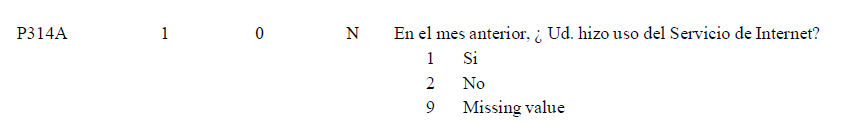

In [62]:
generar_tabla_recuento(base_filtrada, "p314d", "Ud., usa Internet al menos:",True, True) #¿Ud., usa Internet al menos: 
# 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,"Ud., usa Internet al menos:",Recuento,Porcentaje
0,1.0,"1,645,932",86.8
1,2.0,"240,619",12.7
2,3.0,"9,755",0.5
3,4.0,854,0.1
4,Total,"1,897,160",100.0


In [63]:
generar_tabla_recuento(base_filtrada, "p315a", "Monto de pago",True, True) #¿Ud., usa Internet al menos: 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,Monto de pago,Recuento,Porcentaje
0,1.0,"2,497",4.5
1,2.0,"8,891",15.9
2,3.0,"2,948",5.3
3,4.0,"4,862",8.7
4,5.0,"13,277",23.8
5,6.0,774,1.4
6,7.0,676,1.2
7,8.0,"1,690",3.0
8,9.0,209,0.4
9,10.0,"10,352",18.5


In [64]:
generar_tabla_recuento(base_filtrada, "p315b", "Monto pago 2",True, True) #¿Ud., usa Internet al menos: 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,Monto pago 2,Recuento,Porcentaje
0,1.0,782,39.5
1,3.0,396,20.0
2,17.0,79,4.0
3,20.0,481,24.3
4,30.0,244,12.3
5,Total,"1,983",100.0


## EQUIPO QUE UTILIZO PARA INGRESAR A INTERNET

### Acceso - Laptop

In [65]:
generar_tabla_recuento(base_filtrada, "i_laptop", "Uso del internet a traves de una LAPTOP", True, True)

,Uso del internet a traves de una LAPTOP,Recuento,Porcentaje
0,0.0,"3,806,488",90.8
1,1.0,"385,808",9.2
2,Total,"4,192,297",100.0


### Acceso - Computadora

In [66]:
generar_tabla_recuento(base_filtrada, "i_computadora", "Uso del internet a traves de una computadora",True, True)

,Uso del internet a traves de una computadora,Recuento,Porcentaje
0,0.0,"3,619,337",86.3
1,1.0,"572,960",13.7
2,Total,"4,192,297",100.0


### Acceso - Tablet

In [67]:
generar_tabla_recuento(base_filtrada, "i_tablet", "Uso del internet a traves de una TABLET",True, True)

,Uso del internet a traves de una TABLET,Recuento,Porcentaje
0,0.0,"4,097,321",97.7
1,1.0,"94,976",2.3
2,Total,"4,192,297",100.0


### Acceso - Otro

In [68]:
generar_tabla_recuento(base_filtrada, "i_otro", "Uso del internet a traves de una OTRO", True, True)

,Uso del internet a traves de una OTRO,Recuento,Porcentaje
0,0.0,"3,388,488",80.8
1,1.0,"803,809",19.2
2,Total,"4,192,297",100.0


### Acceso - Celular sin plan de datos

In [69]:
generar_tabla_recuento(base_filtrada, "i_cel_sdatos", "Uso del internet a traves de una CELULAR SIN PLAN DE DATOS",True, True)

,Uso del internet a traves de una CELULAR SIN PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"1,991,373",47.5
1,1.0,"2,200,924",52.5
2,Total,"4,192,297",100.0


### Acceso - Celular con plan de datos

In [70]:
generar_tabla_recuento(base_filtrada, "i_cel_cdatos", "Uso del internet a traves de una CELULAR CON PLAN DE DATOS",True,True)

,Uso del internet a traves de una CELULAR CON PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"3,358,425",80.1
1,1.0,"833,872",19.9
2,Total,"4,192,297",100.0


In [71]:
#generar_tabla_recuento(base_filtrada, "p314b1_5", "Uso del internet a traves de una CELULAR DE SU CENTRO DE TRABAJO", guardar_como_jpeg=True) 

## DIMENSION -APROPIACION - Para qué uso el internet

In [72]:
generar_tabla_recuento(base_filtrada, "i_obtener_info", "Usó el Internet para: Obtener información",True,True)

,Usó el Internet para: Obtener información,Recuento,Porcentaje
0,0.0,"318,008",16.8
1,1.0,"1,579,152",83.2
2,Total,"1,897,160",100.0


In [73]:
generar_tabla_recuento(base_filtrada, "i_comunicarse", "Usó el Internet para: Comunicarsen",True,True)

,Usó el Internet para: Comunicarsen,Recuento,Porcentaje
0,0.0,"265,918",14.0
1,1.0,"1,631,243",86.0
2,Total,"1,897,160",100.0


In [74]:
generar_tabla_recuento(base_filtrada, "i_comprar_pdts_ss", "Usó el Internet para: Comprar productos_servicios",True,True)

,Usó el Internet para: Comprar productos_servicios,Recuento,Porcentaje
0,0.0,"1,870,405",98.6
1,1.0,"26,755",1.4
2,Total,"1,897,160",100.0


In [75]:
generar_tabla_recuento(base_filtrada,'i_operaciones_bancarias', 'Usó el Internet para: Operaciones de banca electrónica', True, True)


,Usó el Internet para: Operaciones de banca electrónica,Recuento,Porcentaje
0,0.0,"1,890,421",99.6
1,1.0,"6,739",0.4
2,Total,"1,897,160",100.0


In [76]:
generar_tabla_recuento(base_filtrada, "i_edu_formal", "Usó el Internet para: Educación formal y actividades de capacitación",True,True)

,Usó el Internet para: Educación formal y actividades de capacitación,Recuento,Porcentaje
0,0.0,"1,378,532",72.7
1,1.0,"518,628",27.3
2,Total,"1,897,160",100.0


In [77]:
generar_tabla_recuento(base_filtrada, "i_transacciones", "Usó el Internet para: Transacciones",True,True)

,Usó el Internet para: Transacciones,Recuento,Porcentaje
0,0.0,"1,876,394",98.9
1,1.0,"20,767",1.1
2,Total,"1,897,160",100.0


In [78]:
generar_tabla_recuento(base_filtrada, "i_act_entretenimiento", "Usó el Internet para: Actividades de entretenimiento",True,True)

,Usó el Internet para: Actividades de entretenimiento,Recuento,Porcentaje
0,0.0,"427,739",22.5
1,1.0,"1,469,422",77.4
2,Total,"1,897,160",100.0


In [79]:
generar_tabla_recuento(base_filtrada, "i_vender_pdts", "Usó el Internet para: Vender productos_servicios",True,True)

,Usó el Internet para: Vender productos_servicios,Recuento,Porcentaje
0,0.0,"1,885,069",99.4
1,1.0,"12,091",0.6
2,Total,"1,897,160",100.0


In [80]:
generar_tabla_recuento(base_filtrada, "p316_9", "Usó el Internet para: Otro",True,True)

,Usó el Internet para: Otro,Recuento,Porcentaje
0,0.0,"1,879,748",99.1
1,1.0,"17,412",0.9
2,Total,"1,897,160",100.0


In [81]:
generar_tabla_recuento(base_filtrada, "p316_10", "Usó el Internet para: Otro2",True,True)

,Usó el Internet para: Otro2,Recuento,Porcentaje
0,0.0,"1,896,846",100.0
1,1.0,314,0.0
2,Total,"1,897,160",100.0


In [82]:
generar_tabla_recuento(base_filtrada, "p316_11", "Usó el Internet para: Otro3",True,True)

,Usó el Internet para: Otro3,Recuento,Porcentaje
0,0.0,"1,897,160",100.0
1,Total,"1,897,160",100.0


In [83]:
generar_tabla_recuento(base_filtrada, "i_descarga_antivirus", "Usó el Internet para: descarga de antivirus",True,True)

,Usó el Internet para: descarga de antivirus,Recuento,Porcentaje
0,0.0,"1,700,296",89.6
1,1.0,"196,864",10.4
2,Total,"1,897,160",100.0


## ACTIVIDADES INFORMÁTICAS - para personas de 14 +

## CLASES A DISTANCIA

In [84]:
# Cuenta los valores nulos en la columna "mi_columna"
nulos_en_columna = base_filtrada['cl_medio_tv'].isnull().sum()

# Muestra el resultado
print("Cantidad de valores nulos en 'mi_columna':", nulos_en_columna)

Cantidad de valores nulos en 'mi_columna': 2892


In [85]:
generar_tabla_recuento(base_filtrada, "cl_medio_tv", "Acceso al contenido de clase - TELEVISION",True, True)

,Acceso al contenido de clase - TELEVISION,Recuento,Porcentaje
0,0.0,"2,671,822",52.8
1,1.0,"2,393,673",47.2
2,Total,"5,065,495",100.0


In [86]:
generar_tabla_recuento(base_filtrada, "cl_medio_radio", "Acceso al contenido de clase - RADIO",True, True)

,Acceso al contenido de clase - RADIO,Recuento,Porcentaje
0,0.0,"4,174,305",82.4
1,1.0,"891,190",17.6
2,Total,"5,065,495",100.0


In [87]:
generar_tabla_recuento(base_filtrada, "cl_medio_plataforma_virtual", "Acceso al contenido de clase - PLATAFORMA VIRTUAL",True,True)

,Acceso al contenido de clase - PLATAFORMA VIRTUAL,Recuento,Porcentaje
0,0.0,"3,419,670",67.5
1,1.0,"1,645,825",32.5
2,Total,"5,065,495",100.0


In [88]:
generar_tabla_recuento(base_filtrada, "cl_medio_otro", "Acceso al contenido de clase - OTRO",True,True)

,Acceso al contenido de clase - OTRO,Recuento,Porcentaje
0,0.0,"4,963,953",98.0
1,1.0,"101,542",2.0
2,Total,"5,065,495",100.0


In [89]:
generar_tabla_recuento(base_filtrada, "cl_medio_wsp", "Acceso al contenido de clase - WHATSAPP",True,True)

,Acceso al contenido de clase - WHATSAPP,Recuento,Porcentaje
0,0.0,"1,707,086",33.7
1,1.0,"3,358,408",66.3
2,Total,"5,065,495",100.0


In [90]:
generar_tabla_recuento(base_filtrada, "cl_medio_correo", "Acceso al contenido de clase - CORREO",True,True)

,Acceso al contenido de clase - CORREO,Recuento,Porcentaje
0,0.0,"4,887,306",96.5
1,1.0,"178,188",3.5
2,Total,"5,065,495",100.0


In [91]:
generar_tabla_recuento(base_filtrada, "cl_medio_llamadas", "Acceso al contenido de clase - LLAMADAS",True,True)

,Acceso al contenido de clase - LLAMADAS,Recuento,Porcentaje
0,0.0,"3,604,929",71.2
1,1.0,"1,460,566",28.8
2,Total,"5,065,495",100.0


In [92]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_interaccion", "Acceso al contenido de clase - INTERACCION PROFESOR",True,True)

,Acceso al contenido de clase - INTERACCION PROFESOR,Recuento,Porcentaje
0,0.0,"1,894,223",37.4
1,1.0,"3,171,272",62.6
2,Total,"5,065,495",100.0


In [93]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_videos", "Acceso al contenido de clase - VIDEOS",True,True)

,Acceso al contenido de clase - VIDEOS,Recuento,Porcentaje
0,0.0,"2,184,106",43.1
1,1.0,"2,881,389",56.9
2,Total,"5,065,495",100.0


In [94]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_documentos", "Acceso al contenido de clase - DOCUMENTOS",True,True)

,Acceso al contenido de clase - DOCUMENTOS,Recuento,Porcentaje
0,0.0,"1,233,859",24.4
1,1.0,"3,831,636",75.6
2,Total,"5,065,495",100.0


In [95]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_otros", "Acceso al contenido de clase - OTROS",True,True)

,Acceso al contenido de clase - OTROS,Recuento,Porcentaje
0,0.0,"5,040,685",99.5
1,1.0,"24,810",0.5
2,Total,"5,065,495",100.0


In [96]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_msm_audio", "Acceso al contenido de clase - MENSAJES DE AUDIO",True,True)

,Acceso al contenido de clase - MENSAJES DE AUDIO,Recuento,Porcentaje
0,0.0,"3,144,475",62.1
1,1.0,"1,921,020",37.9
2,Total,"5,065,495",100.0


In [97]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_msm_texto", "Acceso al contenido de clase - MENSAJES DE TEXTO",True,True)

,Acceso al contenido de clase - MENSAJES DE TEXTO,Recuento,Porcentaje
0,0.0,"3,364,398",66.4
1,1.0,"1,701,097",33.6
2,Total,"5,065,495",100.0


In [98]:
generar_tabla_recuento(base_filtrada, "cl_desarrollo_sin_acompañamiento", "Acceso al contenido de clase - SIN ACOMPAÑAMIENTO",True,True)

,Acceso al contenido de clase - SIN ACOMPAÑAMIENTO,Recuento,Porcentaje
0,0.0,"4,933,862",97.4
1,1.0,"131,633",2.6
2,Total,"5,065,495",100.0


# Graficos

## V. Continuas - Miembros por hogar y Edad

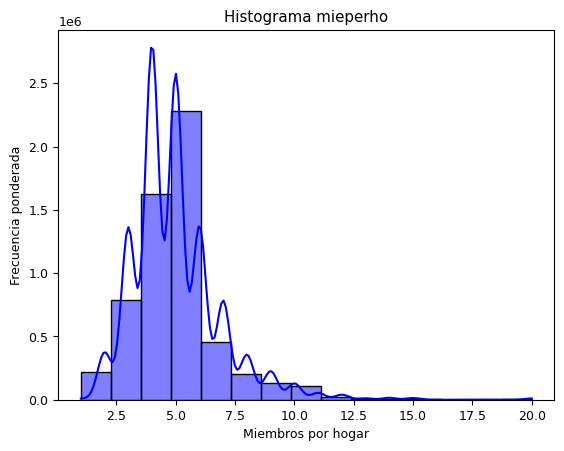

In [99]:
guardar_histograma_con_pesos(base_filtrada, 'mieperho','Miembros por hogar')

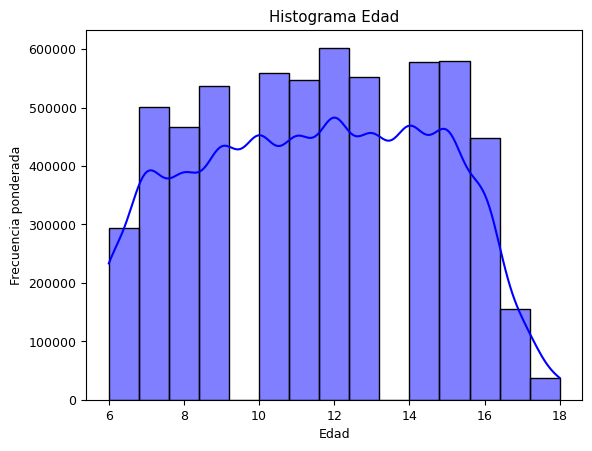

In [100]:
guardar_histograma_con_pesos(base_filtrada, 'Edad','Edad')

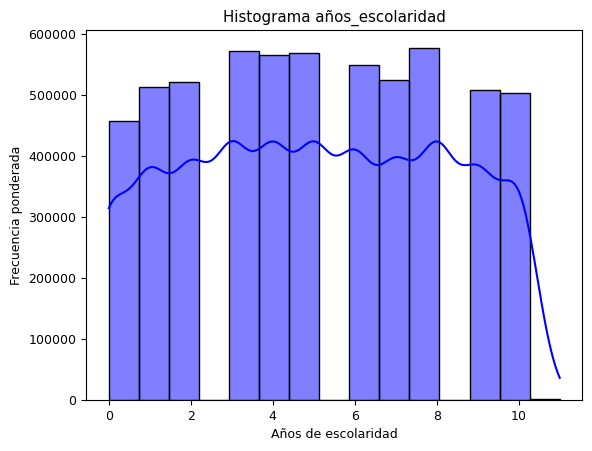

In [101]:
guardar_histograma_con_pesos(base_filtrada, 'años_escolaridad','Años de escolaridad')

## V. Cualitativas - Nivel educativo y centro de estudios

### Func. Graf de barras

In [102]:
def guardar_graf_barras(columna_categorica, labels):
    # Crear una paleta de colores personalizada para las categorías
    num_categories = len(labels)
    custom_palette = ["#4c72b0", "#dd8452", "#55a868", "#c44e52", "#8172b3","#937860", "#da8bc3", "#8c8c8c", "#ccb974", "#64b5cd",
    "#808000", "#000080", "#006400", "#808000", "#669966","#007777", "#000080", "#00008B", "#6699CC", "#ADD8E6","#8B0000", "#A52A2A", 
    "#800000", "#D2691E", "#FFD700",'#4c72b0'][:num_categories]

    # Crear el gráfico de barras
    ax = sns.barplot(x=columna_categorica, y='factor07', data=base_filtrada, estimator=sum, ci=None, palette=custom_palette)

    # Etiquetar las barras con los porcentajes
    total = base_filtrada['factor07'].sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height/total)*100:.0f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'estadistico_{columna_categorica}.png'

    # Eliminar etiquetas y marcas del eje y
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Etiquetas y título
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Porcentaje de estudiante por {columna_categorica}')
    
    # Especificar el número de columnas en la leyenda (en este caso, 2 columnas)
    ncol = 2
    
    # Reducir el tamaño de fuente de la leyenda
    handles = [plt.Rectangle((0,0),1,1, color=col) for col in custom_palette[:len(labels)]]
    plt.legend(handles, labels, title='Leyenda', loc='upper left', fontsize=8, bbox_to_anchor=(1, 1), ncol=ncol)
    
    # Eliminar los spines derecho y superior
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

## Nivel educativo y centro de estudios

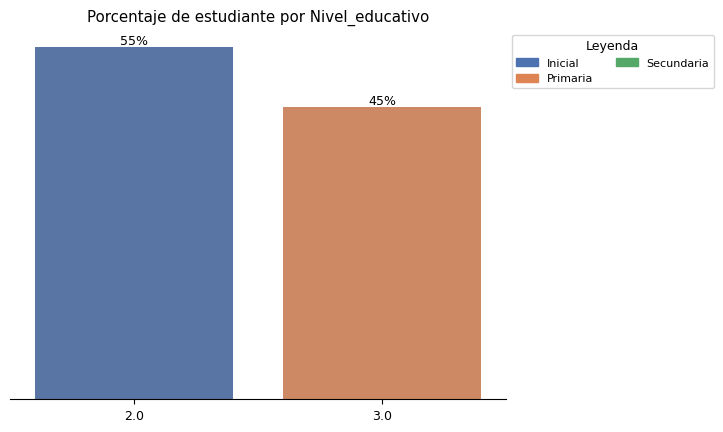

In [103]:
label = ["Inicial","Primaria","Secundaria"]
guardar_graf_barras('Nivel_educativo', labels = label)

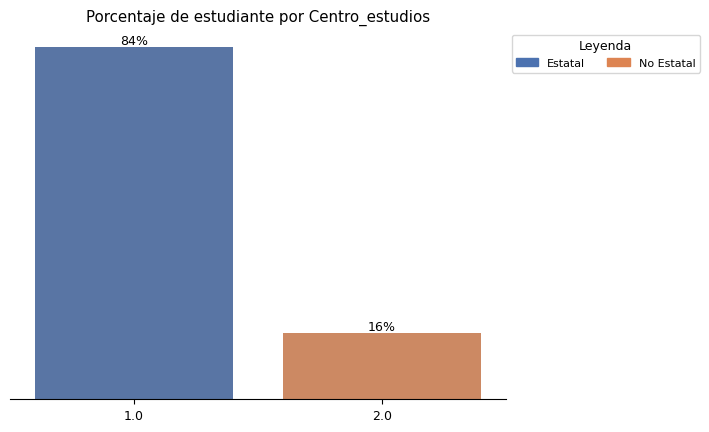

In [104]:
label = ["Estatal","No Estatal"]
guardar_graf_barras('Centro_estudios', labels = label)

## V.C. Idioma y Sexo

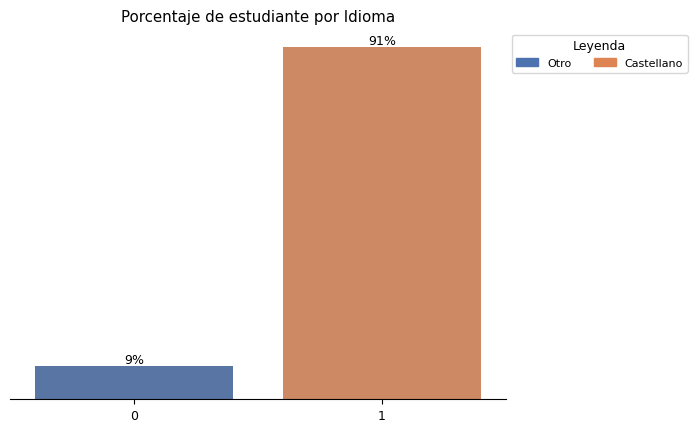

In [105]:
label = ["Otro","Castellano"]
guardar_graf_barras('Idioma', labels = label)

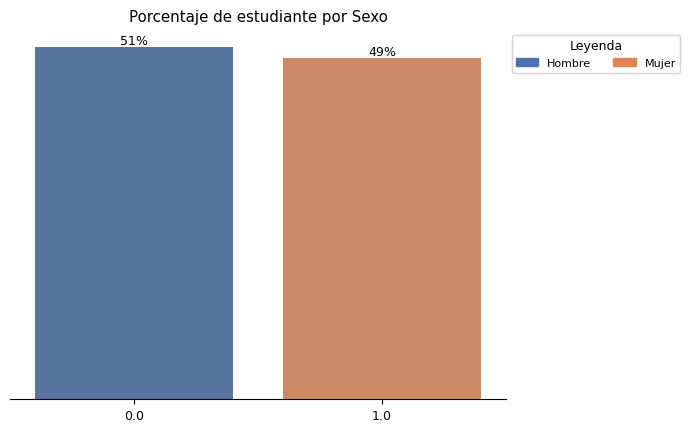

In [106]:
label= ["Hombre","Mujer"]
guardar_graf_barras('Sexo', label)

## Area y Estrato Social

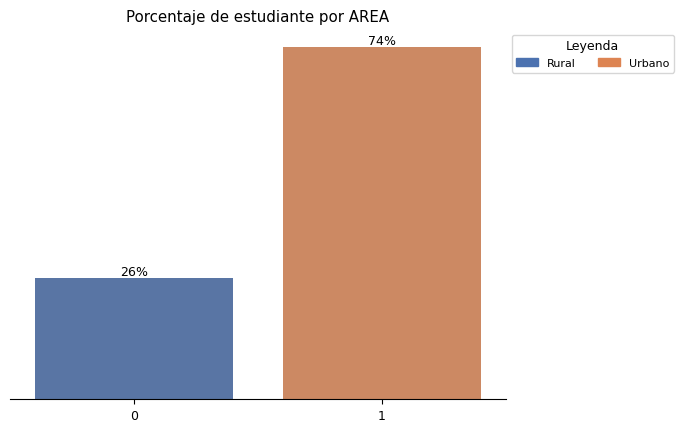

In [107]:
label = ["Rural", "Urbano"]
guardar_graf_barras('AREA', label)

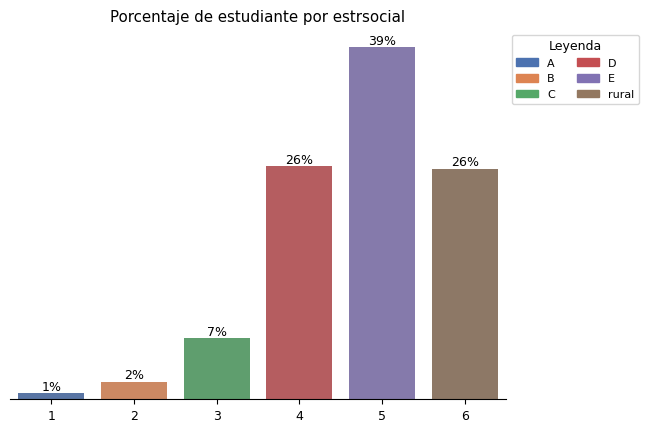

In [108]:
label = ["A", "B","C","D", "E","rural"]
guardar_graf_barras('estrsocial',label)

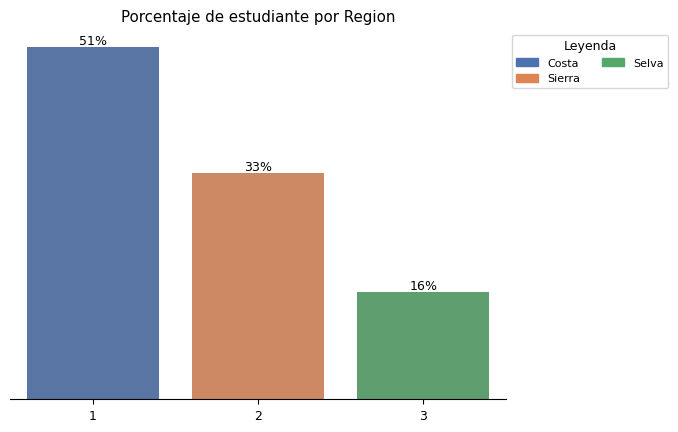

In [109]:
label = ["Costa", "Sierra","Selva"]
guardar_graf_barras('Region',label)

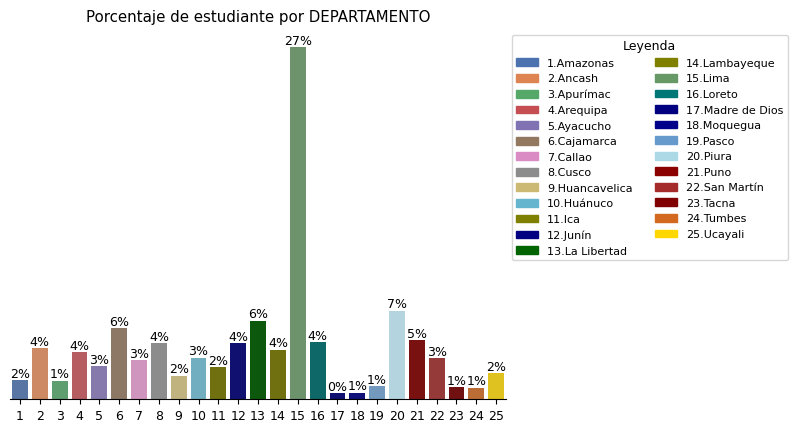

In [110]:
label = ["1.Amazonas","2.Ancash","3.Apurímac","4.Arequipa","5.Ayacucho","6.Cajamarca","7.Callao","8.Cusco","9.Huancavelica","10.Huánuco", "11.Ica","12.Junín","13.La Libertad",
         "14.Lambayeque","15.Lima","16.Loreto", "17.Madre de Dios","18.Moquegua","19.Pasco","20.Piura", "21.Puno","22.San Martín", "23.Tacna","24.Tumbes","25.Ucayali"]
guardar_graf_barras('DEPARTAMENTO', label)

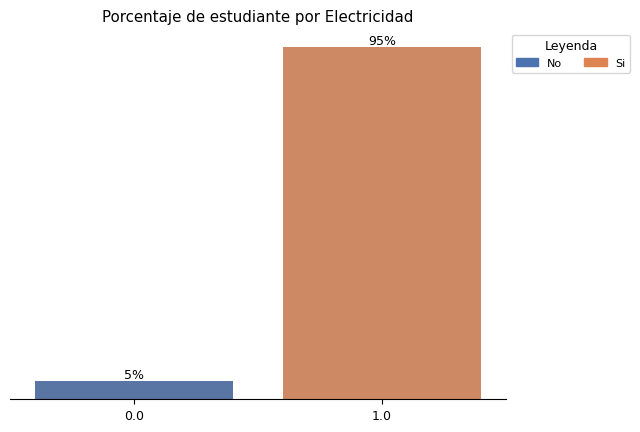

In [111]:
label = ["No","Si"]
guardar_graf_barras('Electricidad', label)

In [112]:
base_filtrada_ = base_filtrada.copy()

## Grafico de barras - USO (Donde uso internet)

### Funcion

In [113]:
def barras(variable):
    freq_1 = base_filtrada_[[ "factor07",variable]].groupby([variable]).sum().reset_index()
    total_recuento = freq_1['factor07'].sum()
    freq_1['Porcentaje'] = (freq_1['factor07'] / total_recuento * 100).round(2)
    freq_1.rename(columns={variable: 'variable','factor07': 'value'}, inplace=True)
    freq_1 =  freq_1.tail(1)
    freq_1['variable'] = freq_1['variable'].replace(1.0, variable)
    freq_1['value'] = freq_1['value'].apply(lambda x: '{:,.0f}'.format(x))
    #freq_1['Porcentaje'] = freq_1['Porcentaje'].apply(lambda x: '{:.3f}'.format(x))
    
    return freq_1

In [114]:
i_uso= barras("i_uso")
i_uso_cedu = barras("i_uso_cedu")
i_uso_trab = barras("i_uso_trab")
i_uso_hog = barras("i_uso_hog")
i_uso_cab = barras("i_uso_cab")
i_uso_casotr = barras("i_uso_casotr")
i_uso_otro = barras("i_uso_otro")
i_uso_movil = barras("i_uso_movil")

In [115]:
data3 = pd.concat([i_uso_cedu, i_uso_trab, i_uso_hog, i_uso_cab, i_uso_casotr,i_uso_otro, i_uso_movil], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### plot

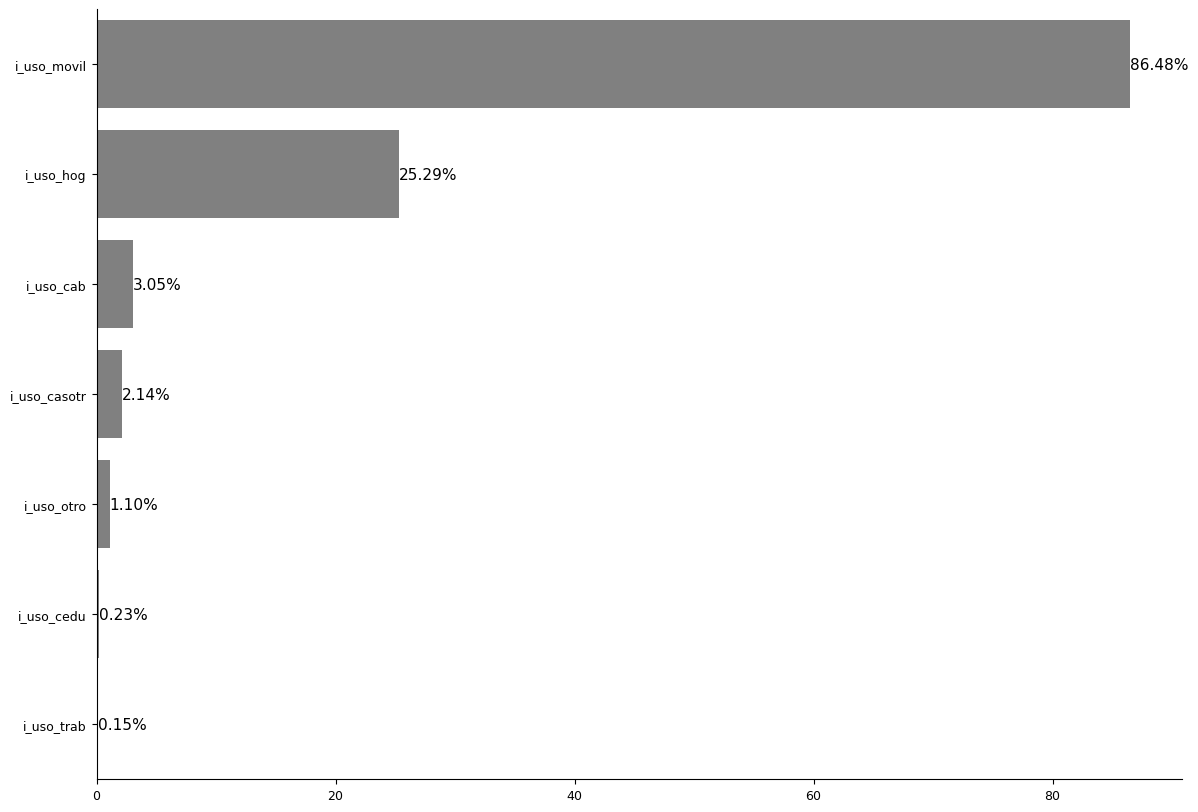

In [116]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_uso.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)
plt.show()

## Grafico de barras - ACCESO - Equipo de acceso de servicio de Internet

In [117]:
i_computadora = barras("i_computadora")
i_tablet = barras("i_tablet")
i_laptop = barras("i_laptop")
i_otro = barras("i_otro")
i_cel_sdatos = barras("i_cel_sdatos")
i_cel_cdatos = barras("i_cel_cdatos")

In [118]:
data3 = pd.concat([i_computadora, i_tablet, i_laptop, i_otro, i_cel_sdatos, i_cel_cdatos], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### Plot

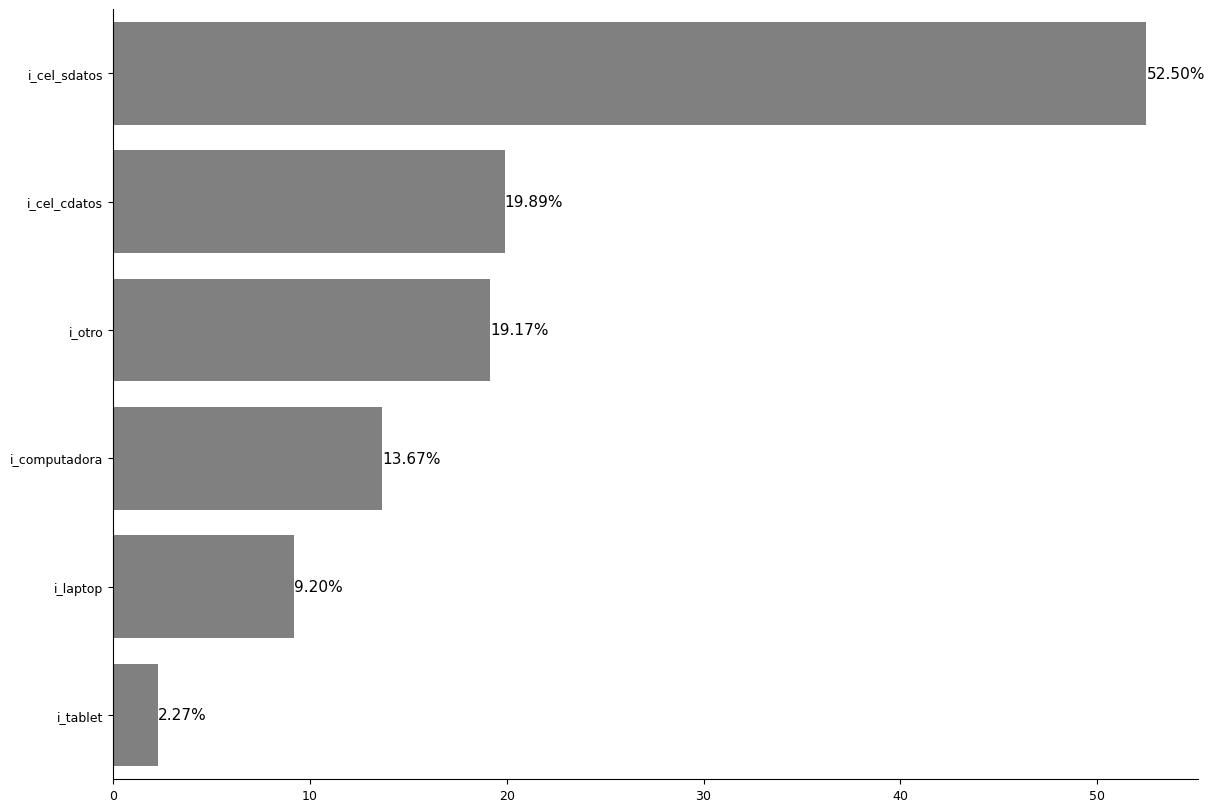

In [119]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_acceso.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

## Grafico - Para qué uso el internet

In [120]:
i_obtener_info = barras("i_obtener_info")
i_comunicarse = barras("i_comunicarse")
i_comprar_pdts_ss = barras("i_comprar_pdts_ss")
i_operaciones_bancarias = barras("i_operaciones_bancarias")
i_edu_formal = barras("i_edu_formal")
i_transacciones = barras("i_transacciones")
i_act_entretenimiento = barras("i_act_entretenimiento")
i_vender_pdts= barras("i_vender_pdts")
p316_9 = barras("p316_9")
p316_10 = barras("p316_10")
p316_11 = barras("p316_11")
i_descarga_antivirus = barras("i_descarga_antivirus")

In [121]:
data3 = pd.concat([i_obtener_info, i_comunicarse,i_comprar_pdts_ss, i_operaciones_bancarias, i_edu_formal, i_transacciones,
                  i_act_entretenimiento, i_vender_pdts, i_descarga_antivirus], axis=0)
#p316_9, p316_10, p316_11
data3 = data3.reset_index(drop=True)
#data3

### Plot

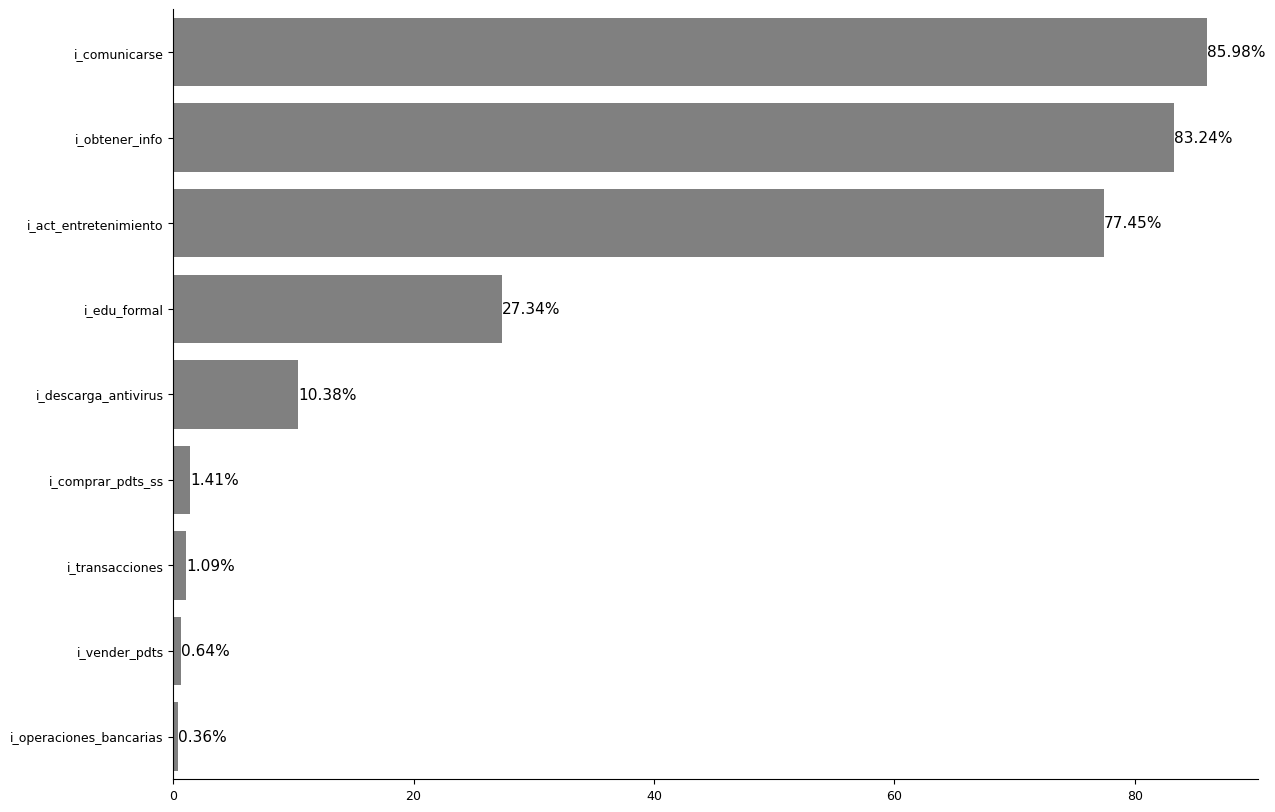

In [122]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_apropiacion.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

## Grafico - ACTIVIDADES INFORMÁTICAS +14

In [123]:
ai_mover_archivo = barras("ai_mover_archivo")
ai_copiar_pegar = barras("ai_copiar_pegar")
ai_enviar_correos = barras("ai_enviar_correos")
ai_form_excel = barras("ai_form_excel")
ai_conec_dispositivos = barras("ai_conec_dispositivos")
ai_software = barras("ai_software")
ai_presentaciones_electronicas = barras("ai_presentaciones_electronicas")
ai_tranfer_archivos = barras("ai_tranfer_archivos")
ai_leng_programacion = barras("ai_leng_programacion")
ai_otros = barras("ai_otros")

In [124]:
data3 = pd.concat([ai_mover_archivo, ai_copiar_pegar,ai_enviar_correos,ai_form_excel,ai_conec_dispositivos,
                 ai_software,ai_presentaciones_electronicas,ai_tranfer_archivos,ai_leng_programacion,ai_otros], axis=0)
#p316_9, p316_10, p316_11
data3 = data3.reset_index(drop=True)
#data3

### plot

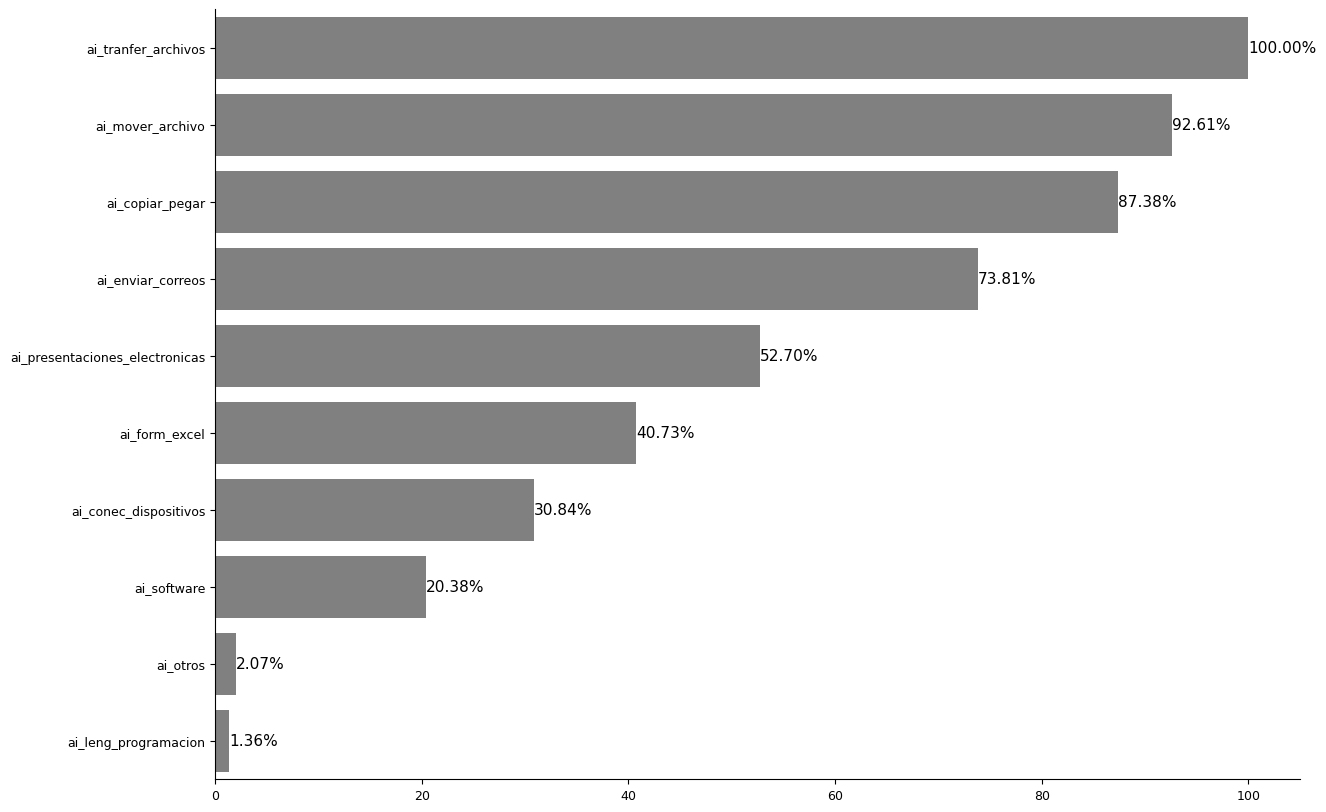

In [125]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_act_informaticas.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

## Grafico de barras - Clases a DISTANCIA

In [126]:
cl_medio_tv         =   barras("cl_medio_tv")
cl_medio_radio      = barras("cl_medio_radio")
cl_medio_plataforma_virtual = barras("cl_medio_plataforma_virtual")
cl_medio_otro       = barras("cl_medio_otro")
cl_medio_wsp        = barras("cl_medio_wsp")
cl_medio_correo     = barras("cl_medio_correo")
cl_medio_llamadas   = barras("cl_medio_llamadas")

In [127]:
cl_medio_tv 

,variable,value,Porcentaje
1,cl_medio_tv,"2,393,673",47.25


In [128]:
data3 = pd.concat([cl_medio_tv, cl_medio_radio, cl_medio_plataforma_virtual, cl_medio_otro, cl_medio_wsp, cl_medio_correo, cl_medio_llamadas], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,cl_medio_tv,"2,393,673",47.250000
1,cl_medio_radio,"891,190",17.590000
2,cl_medio_plataforma_virtual,"1,645,825",32.490002
3,cl_medio_otro,"101,542",2.000000
4,cl_medio_wsp,"3,358,408",66.300003
5,cl_medio_correo,"178,188",3.520000
6,cl_medio_llamadas,"1,460,566",28.830000


### plot

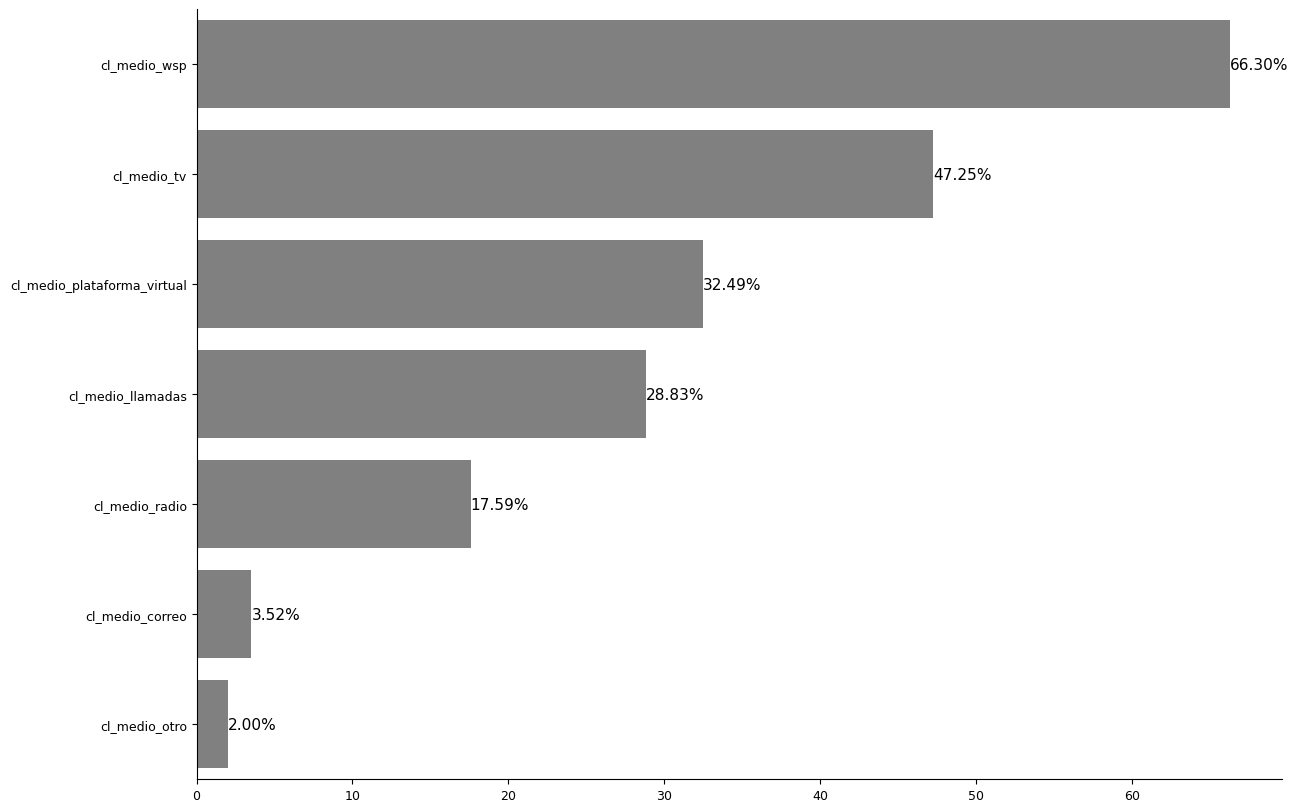

In [129]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiple_clases_medio.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

In [130]:

cl_desarrollo_interaccion = barras("cl_desarrollo_interaccion")
cl_desarrollo_videos     = barras("cl_desarrollo_videos")
cl_desarrollo_documentos = barras("cl_desarrollo_documentos")
cl_desarrollo_otros      = barras("cl_desarrollo_otros")
cl_desarrollo_msm_audio  = barras("cl_desarrollo_msm_audio")
cl_desarrollo_msm_texto  = barras("cl_desarrollo_msm_texto")
cl_desarrollo_sin_acompañamiento = barras("cl_desarrollo_sin_acompañamiento")

In [131]:
data3 = pd.concat([cl_desarrollo_interaccion, cl_desarrollo_videos, cl_desarrollo_documentos, cl_desarrollo_otros, cl_desarrollo_msm_audio, cl_desarrollo_msm_texto,
                   cl_desarrollo_sin_acompañamiento], axis=0)
data3 = data3.reset_index(drop=True)
#data3

### Plot

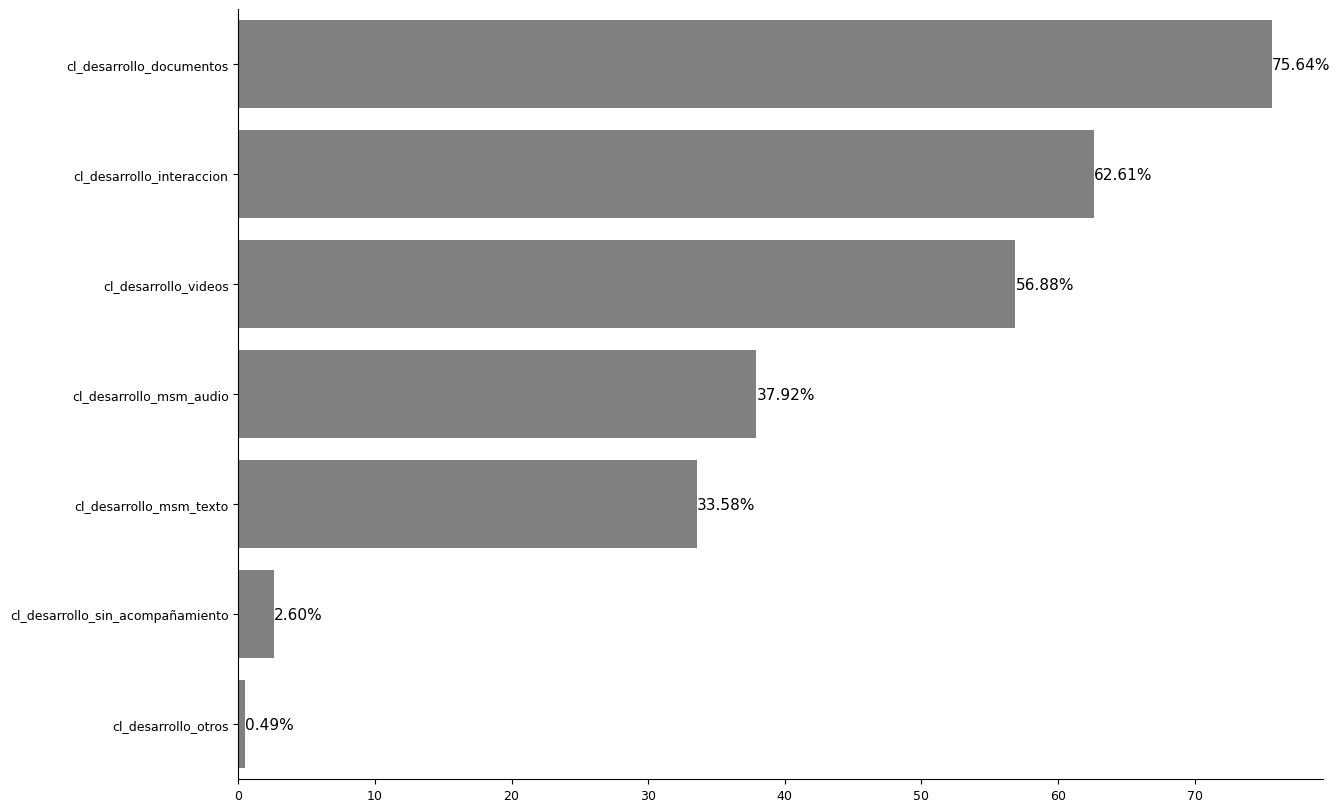

In [132]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiple_clases_medio_desarrollo.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

# Regresión

In [ ]:
base_filtrada['i_uso'].value_counts()
missing_values = base_filtrada['i_uso'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

In [ ]:
base_filtrada.shape

In [ ]:
#base_filtrada = base_filtrada.dropna(subset=['i_uso']) # 09.10.2023

In [ ]:
# los nombres de las variables deben respresentar al menos una idea de lo que represento
# Revisar qué variables son categoricas y continuas 

In [ ]:
base_filtrada.i_uso.value_counts()

## Variables Y X

In [ ]:
# Define la variable dependiente (binaria) y las variables independientes
#y = base_filtrada['i_uso_hog']
y = base_filtrada['i_uso']
X = base_filtrada[['Sexo', 'Edad','años_escolaridad','mieperho', # 'cel_uso',
                   'Electricidad', 'Idioma',
                   'Centro_estudios', 'AREA']]
weights = base_filtrada['factor07']

In [ ]:
base_filtrada['i_uso'].value_counts()

In [ ]:
base_filtrada['cel_uso'].value_counts()

In [ ]:
base_filtrada['cel_uso'].value_counts()
missing_values = base_filtrada['cel_uso'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

### Dummies

In [ ]:
# Codifica la variable categórica nominal "Region" en variables dummy
departamento_dummies = pd.get_dummies(base_filtrada['estrsocial'], prefix='estrsocial', drop_first=True)

# Codifica la variable categórica ordinal "Nivel_educativo" en variables dummy
nivel_educativo_dummies = pd.get_dummies(base_filtrada['Nivel_educativo'], prefix='Nivel_educativo', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
region_dummies = pd.get_dummies(base_filtrada['Region'], prefix='Region', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
estrato_social_dummies = pd.get_dummies(base_filtrada['DEPARTAMENTO'], prefix='DEPARTAMENTO', drop_first=True)


# Combina las variables dummy con el conjunto de variables independientes
X = pd.concat([X, nivel_educativo_dummies, region_dummies, departamento_dummies, estrato_social_dummies], axis=1)

In [ ]:
#X["Nivel_educativo_2.0"].value_counts(normalize=True)  #PRIMARIA
#X["Nivel_educativo_3.0"].value_counts(normalize=True) # SECUNDARIA

## Regresión Lineal SIMPLE

In [ ]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)
model_linear = sm.OLS(y, X,weights=weights)
results_linear = model_linear.fit()
print(results_linear.summary())

## Modelo Probit

In [ ]:
model_probit = sm.Probit(y, X, weights=weights)
results_probit = model_probit.fit()
print(results_probit.summary())

# Calcula los efectos marginales
efectos_marginales = results_probit.get_margeff()
print(efectos_marginales.summary())

In [ ]:
modelo_seleccion = sm.Probit(y, X).fit()

# Calcular las probabilidades estimadas de pertenecer a la clase positiva
probabilidades_seleccion = modelo_seleccion.predict(X)

# Ecuación de resultado (probit)
X_resultado = X
y_resultado = y

# Calcular los residuos de la ecuación de resultado
residuos_resultado = y_resultado - probabilidades_seleccion

# Agregar los residuos como una nueva columna
X_resultado['residuos_seleccion'] = residuos_resultado

# Estimar el modelo de resultado
modelo_resultado = sm.Probit(y_resultado, X_resultado).fit()

In [ ]:
#residuos_seleccion = model_probit.predict(X) - y

## LOGIT